In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

In [ ]:
def predict(model_path,array_sentence):
  loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path,local_files_only=True)
  tokenizer = AutoTokenizer.from_pretrained(model_path)


  classifier = pipeline(
      "text-classification",
      model=loaded_model,
      tokenizer=tokenizer,
      return_all_scores=True
  )
  results = classifier(array_sentence)
  for i, result in enumerate(results):
      max=0
      emo=''
      print(f"sentence: {array_sentence[i]}")
      print(f"result: {result}")
      for j in range(len(result)):
        if result[j]['score']>max:
          max=result[j]['score']
          emo=result[j]['label']
      print('class :',emo)
      print()

In [ ]:
sentences = [
    "امروز خیلی روز غم انگیزی بود امیدوارم هیچ وقت تکرار نشه",
    "چرا همچین اشتباهی کردی من ازت متنفرم",
    "چه جمله خنده داری"
]

predict("/content/drive/MyDrive/DL/save_best_model",sentences)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


sentence: امروز خیلی روز غم انگیزی بود امیدوارم هیچ وقت تکرار نشه
result: [{'label': 'SAD', 'score': 0.9440757632255554}, {'label': 'HATE', 'score': 0.018382325768470764}, {'label': 'OTHER', 'score': 0.007350400555878878}, {'label': 'FEAR', 'score': 0.00608815485611558}, {'label': 'ANGRY', 'score': 0.0020816423930227757}, {'label': 'HAPPY', 'score': 0.01949799247086048}, {'label': 'SURPRISE', 'score': 0.0025237768422812223}]
class : SAD

sentence: چرا همچین اشتباهی کردی من ازت متنفرم
result: [{'label': 'SAD', 'score': 0.004411958623677492}, {'label': 'HATE', 'score': 0.9798029065132141}, {'label': 'OTHER', 'score': 0.002621607156470418}, {'label': 'FEAR', 'score': 0.002764153527095914}, {'label': 'ANGRY', 'score': 0.002995338523760438}, {'label': 'HAPPY', 'score': 0.000953817623667419}, {'label': 'SURPRISE', 'score': 0.006450287066400051}]
class : HATE

sentence: چه جمله خنده داری
result: [{'label': 'SAD', 'score': 0.016603756695985794}, {'label': 'HATE', 'score': 0.004524085205048323}

In [ ]:
def plot_confusion_matrix(y_test,y_scores, classNames):
    # y_test=np.argmax(y_test, axis=1)
    # y_scores=np.argmax(y_scores, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])

    plt.figure(figsize=(40,40))
    sns.set(font_scale=3.0) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")

In [ ]:
def evaluate(model_path,file_path):
  df = pd.read_csv(file_path)
  sentences=list(df['text'])
  Y_true= list(df['label'])
  emotions=df['label'].unique()

  Y_pred=[]

  print(sentences)
  print(Y_true)

  loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path,local_files_only=True)
  tokenizer = AutoTokenizer.from_pretrained(model_path)

  classifier = pipeline(
      "text-classification",
      model=loaded_model,
      tokenizer=tokenizer,
      return_all_scores=False
  )
  results = classifier(sentences)
  print(results)
  # for i, result in enumerate(results):
  #     max=0
  #     emo=''
  #     for j in range(len(result)):
  #       if result[j]['score']>max:
  #         max=result[j]['score']
  #         emo=result[j]['label']
  #     Y_pred.append(emo)
  # print(Y_pred)
  for pred in results:
    Y_pred.append(pred["label"])

  c=0
  count=0
  for truth,pred in zip(Y_true,Y_pred):
    if truth!=pred:
      print(sentences[c],'\n','true',truth,'\n','pred',pred,'\n')
      print("****************")
      count+=1
    if count>10:
      break
    c+=1

  precision = precision_score(Y_true, Y_pred, average='macro')
  recall = recall_score(Y_true, Y_pred, average='macro')
  f1 = f1_score(Y_true, Y_pred, average='macro')
  accuracy = accuracy_score(Y_true, Y_pred)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 score: ", f1)
  print("accuracy: ", accuracy)

  plot_confusion_matrix(Y_true,Y_pred, emotions)



['این فیلم عالی\u200cبود ، حس خوبی بهم داد', 'دلم برای این موقعیت نگران است', 'امروز هوا خیلی زیباست و من خوشحالم', 'این ماشین اصلا جواب نمیده ، ازش خیلی ناراحتم', 'حالا که این خبرو شنیدم از دلم می\u200cخواستم بخندم یا گریه کنم ؟', 'باید به این مشکلات پایان داد', 'از آخرین اخبار خیلی متعجب شدم', 'امروز خیلی خسته\u200cام و اصلا خوشحال نیستم', 'این کار به نظرم اشتباه بزرگی بود', 'باید به زودی این مشکل را حل کنیم', 'این کتاب جالب و سرگرم\u200cکننده است', 'این دستگاه هیچ کاری نمی\u200cکند ، عصبانی\u200cام', 'از دیدن این تصاویر ناراحت شدم', 'فکر می\u200cکنم امتحان\u200cها را نمی\u200cتوانم قبول شوم', 'این موسیقی زیباست و حس خوبی بهم می\u200cدهد', 'اینجا خیلی خلوت است و احساس تنهایی می\u200cکنم', 'این کلیپ خنده\u200cداری\u200cبود و من خوشحال شدم', 'امیدوارم این مشکلات به زودی حل شوند', 'این جشن تولد خیلی خوب\u200cبود و من خوشحالم', 'از این اظهارنظرها خیلی خوشحال شدم', 'این وضعیت جدید برام ناخوشایند است', 'دلم برای این فرد تنگ\u200cشده\u200cاست', 'این قهری و ناراضی بودن از همه چیز خسته\u200cک

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[{'label': 'HAPPY', 'score': 0.9614533185958862}, {'label': 'FEAR', 'score': 0.8493573069572449}, {'label': 'HAPPY', 'score': 0.9432422518730164}, {'label': 'SAD', 'score': 0.9072446227073669}, {'label': 'SAD', 'score': 0.749559223651886}, {'label': 'OTHER', 'score': 0.7310899496078491}, {'label': 'SURPRISE', 'score': 0.9721714854240417}, {'label': 'SAD', 'score': 0.9296550154685974}, {'label': 'SAD', 'score': 0.8261995315551758}, {'label': 'OTHER', 'score': 0.8424738049507141}, {'label': 'HAPPY', 'score': 0.934814453125}, {'label': 'ANGRY', 'score': 0.8917695879936218}, {'label': 'SAD', 'score': 0.9187077879905701}, {'label': 'SAD', 'score': 0.6070722341537476}, {'label': 'HAPPY', 'score': 0.9460936188697815}, {'label': 'SAD', 'score': 0.8204522132873535}, {'label': 'HAPPY', 'score': 0.9379662275314331}, {'label': 'OTHER', 'score': 0.3731321096420288}, {'label': 'HAPPY', 'score': 0.9423336386680603}, {'label': 'HAPPY', 'score': 0.9578593969345093}, {'label': 'SAD', 'score': 0.55309766

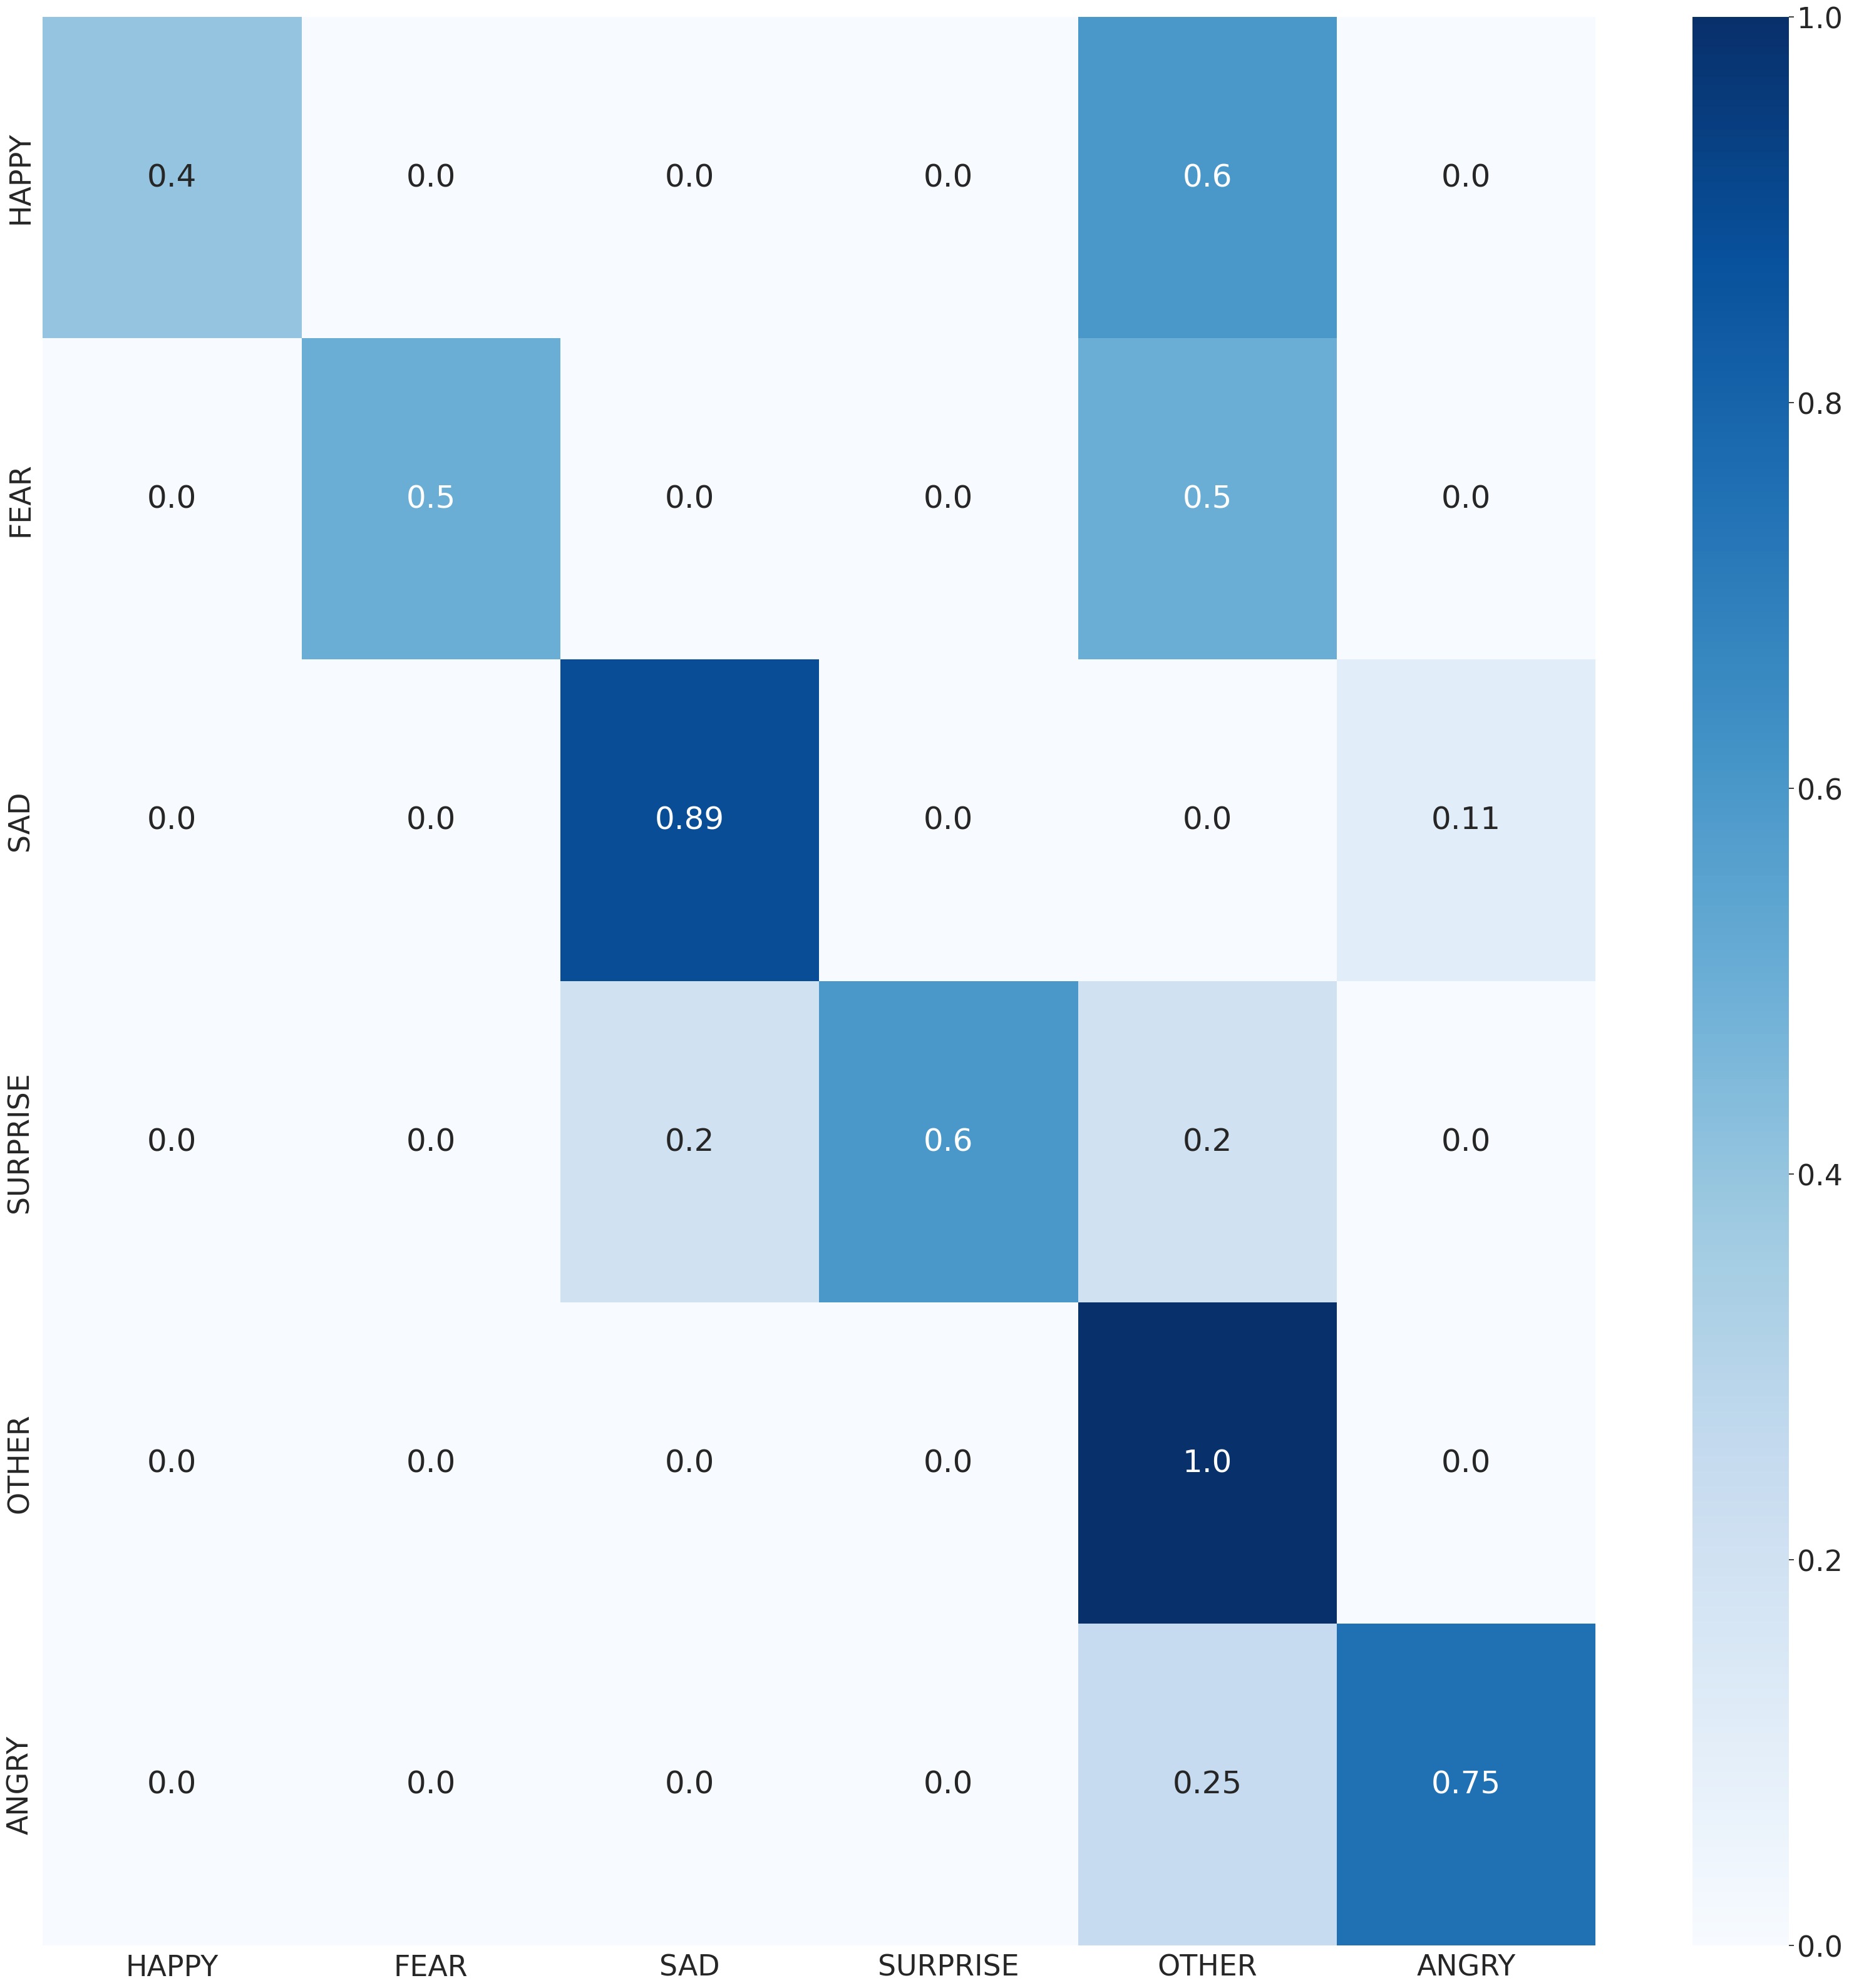

In [ ]:
evaluate('/content/drive/MyDrive/DL_Project/save_best_model','/content/test.csv')

<h2>Evaluate in Test file
</h2>